In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#for presenting maximum columns
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# EDA:

In [4]:
#checking shape of the dataset
df.shape

(1000, 40)

The dataset contains 1000rows and 40columns

In [5]:
#checking datatype in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#checking uniqque values in each column
df.nunique().sort_values(ascending=False)

policy_number                  1000
incident_location              1000
insured_zip                     995
policy_annual_premium           991
policy_bind_date                951
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
incident_date                    60
age                              46
auto_model                       39
incident_hour_of_the_day         24
auto_year                        21
insured_hobbies                  20
auto_make                        14
insured_occupation               14
umbrella_limit                   11
insured_education_level           7
incident_state                    7
incident_city                     7
insured_relationship              6
authorities_contacted             5
witnesses                         4
incident_severity           

In [7]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# dropping Unwanted columns ;

In [8]:
print(df['_c39'].unique())

[nan]


In [9]:
df.drop(columns='_c39',axis=1,inplace=True)

In [10]:
df.drop(columns='policy_number',axis=1,inplace=True)

In [11]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Observation:

we can see the Data is deviated by looking at std dev which is getting more than +-1.

Comparison in Mean and 50%: Some of the column is having Mean value greater than 50% hence we can say that we have skewness prsent in Data which can be find by skew method and can be removed by Power transform or Boxcox method.

Comparison in 75% and Max: Here we can see some columns are having big diff within 75% and Max data hence we can say that outliers can be present which we can see by percentile and can be removed by Z score method.

If we have any irrelavant column by checking corelation so we can remove those columns

# checking null values 

In [12]:

df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

 no null values are present in the dataset

# checking Target variable with graph:

N    753
Y    247
Name: fraud_reported, dtype: int64


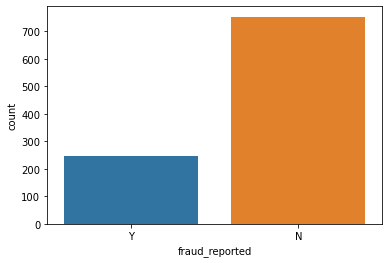

In [13]:
import seaborn as sns
ax=sns.countplot(x="fraud_reported",data=df)
print(df["fraud_reported"].value_counts())

# Data visualization

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


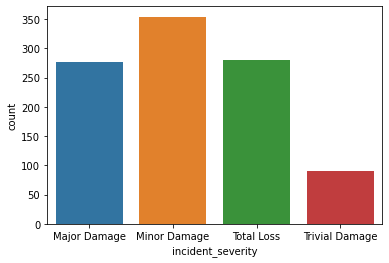

In [14]:
import seaborn as sns
ax=sns.countplot(x="incident_severity",data=df)
print(df["incident_severity"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


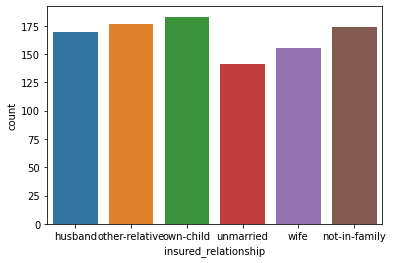

In [15]:
import seaborn as sns
ax=sns.countplot(x="insured_relationship",data=df)
print(df["insured_relationship"].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


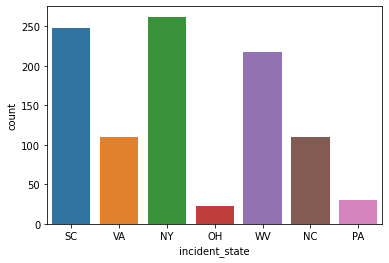

In [16]:
import seaborn as sns
ax=sns.countplot(x="incident_state",data=df)
print(df["incident_state"].value_counts())

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


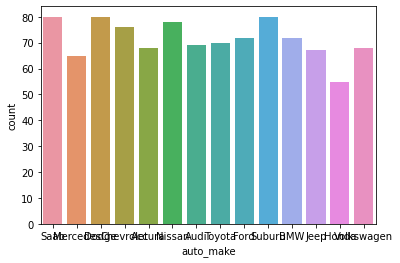

In [17]:
import seaborn as sns
ax=sns.countplot(x="auto_make",data=df)
print(df["auto_make"].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


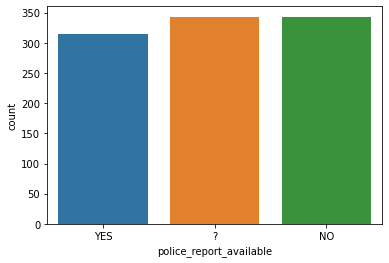

In [18]:
import seaborn as sns
ax=sns.countplot(x="police_report_available",data=df)
print(df["police_report_available"].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


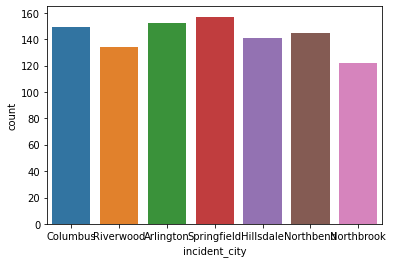

In [19]:
import seaborn as sns
ax=sns.countplot(x="incident_city",data=df)
print(df["incident_city"].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


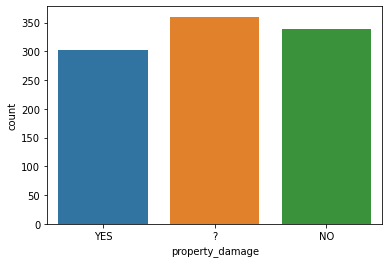

In [20]:
import seaborn as sns
ax=sns.countplot(x="property_damage",data=df)
print(df["property_damage"].value_counts())

# Data conversion using Label Encoder¶
#by using for loop here we encoded the object columns

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['incident_severity','insured_relationship','auto_model','auto_make','police_report_available','property_damage','incident_location','incident_city','incident_state','authorities_contacted','collision_type','incident_type','incident_date','fraud_reported','policy_csl','insured_hobbies','insured_occupation','insured_education_level','insured_sex','policy_bind_date','policy_state',
]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))



In [23]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,1,1,1,0,4,561,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,129,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,2,0,1,4,3,227,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,509,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45,0,3,1,4,0,0,746,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,573,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52,2,2,0,3,1,0,569,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0


now all object columns is encoded

In [24]:
#checking the overall health of the dataset
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.666000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,1.063755,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


Observation:

1. After removing unwanted column we have encoded data for object column in Numeric

2. we have skwness pesent in Data as comparing Mean > 50th Percentile

3. we have outlier present in Data as comparing 75th Percentile and Max

We will validate this assumption and based on we will take Action to handle Null Value, Outliers and Skwness

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   int32  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

now all columns are converted into numeric

<AxesSubplot:>

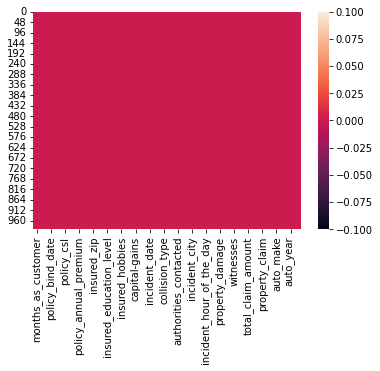

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

no null valuespresent in the data

In [28]:
df.fraud_reported.value_counts(ascending=False)

0    753
1    247
Name: fraud_reported, dtype: int64

here we can see data is unbalanced so we can balanced the data by SMOTE technique

# checking the correlation

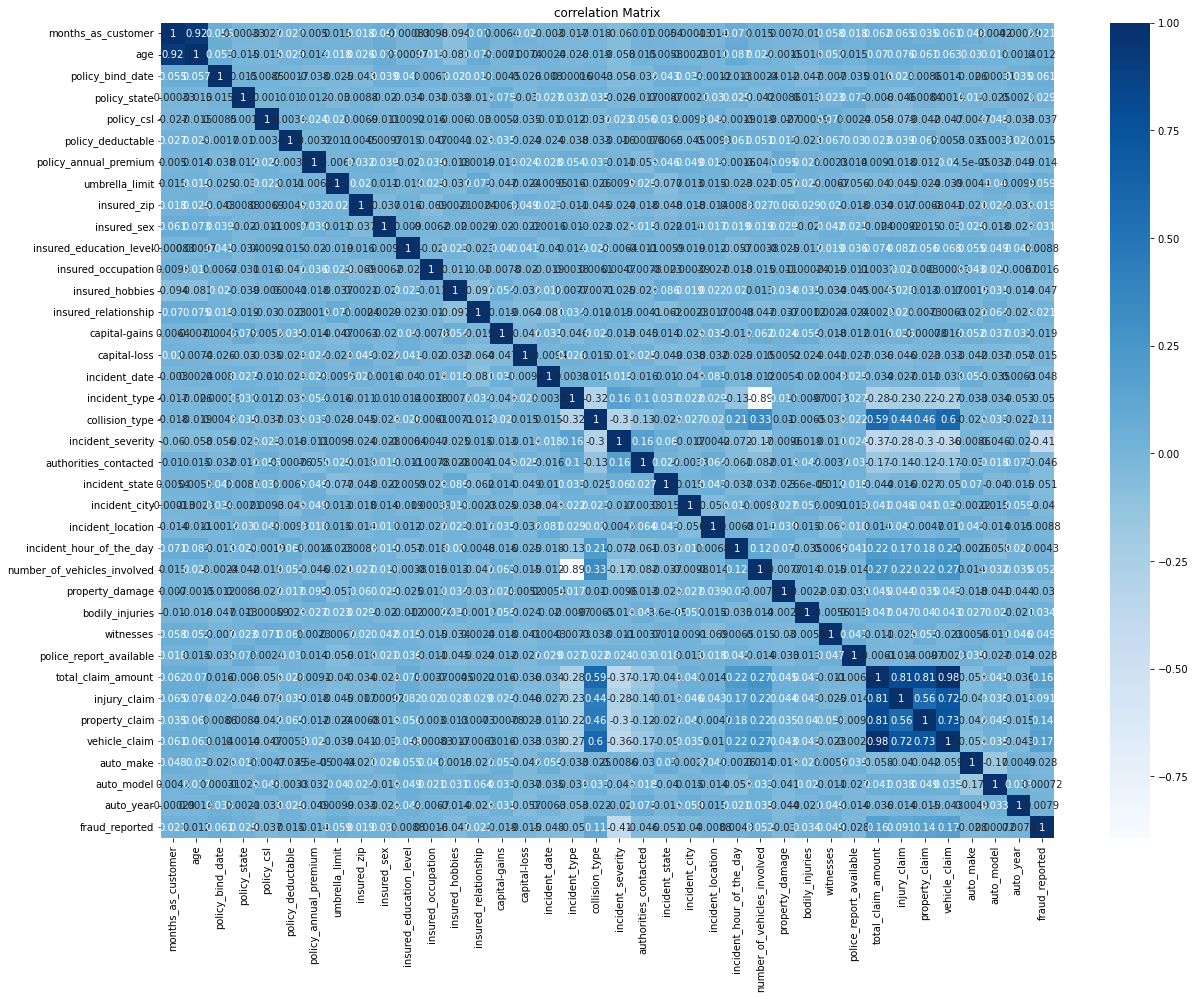

In [29]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[20,15])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

observations: 
    
    so we can see the dataset is very huge so we cannot identify the correlation and multicollinearity.we will check it by VIF 

# checking correlation with Attrition output column

In [30]:
corr_mat['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


In [31]:
df.shape

(1000, 38)

# Data Distribution with graph

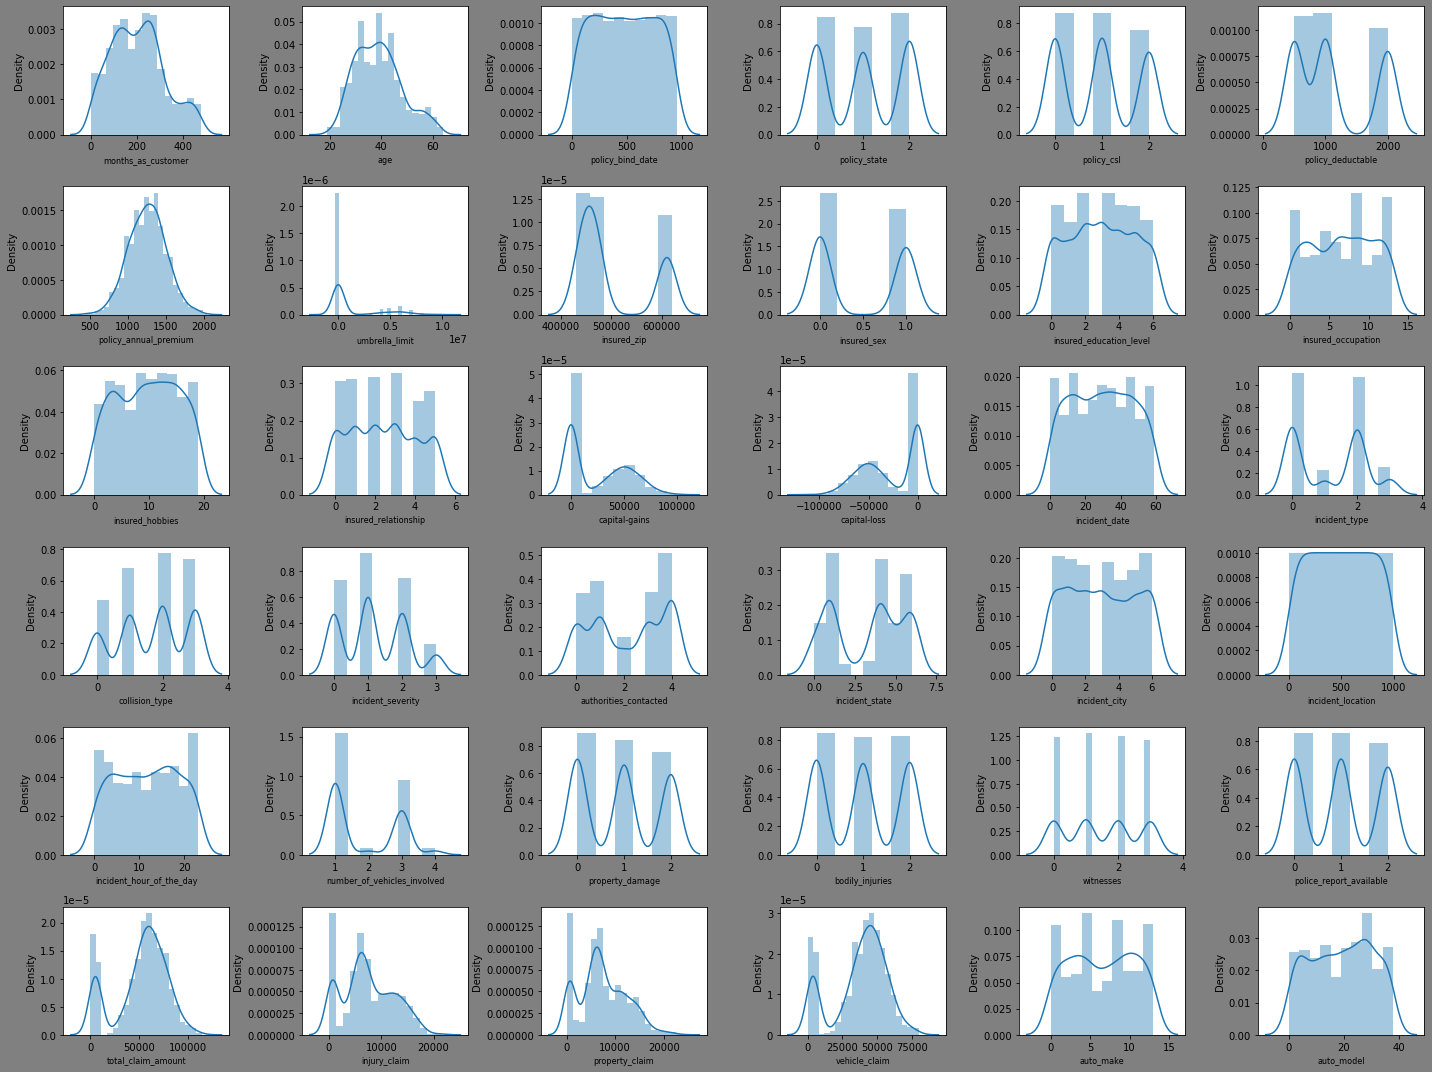

In [32]:
plt.figure(figsize=(20,15),facecolor='gray')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

data is not normally distributed .skewness and ouliers is present in the columns so that we can remove next .

#  checking and handling  outliers By boxplot

we lots of columns in our dataset so we divide the columns and check the outliers

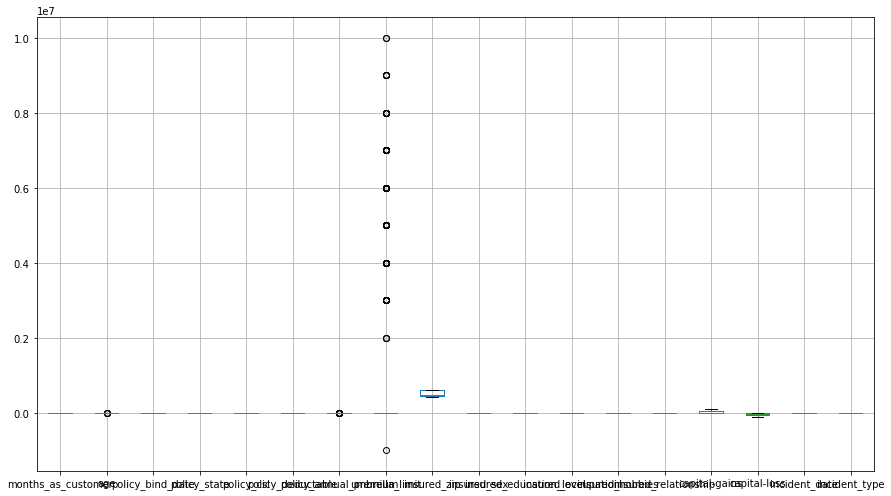

In [33]:
#plotting the boxplot 
df.iloc[:,0:18].boxplot(figsize=(15,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

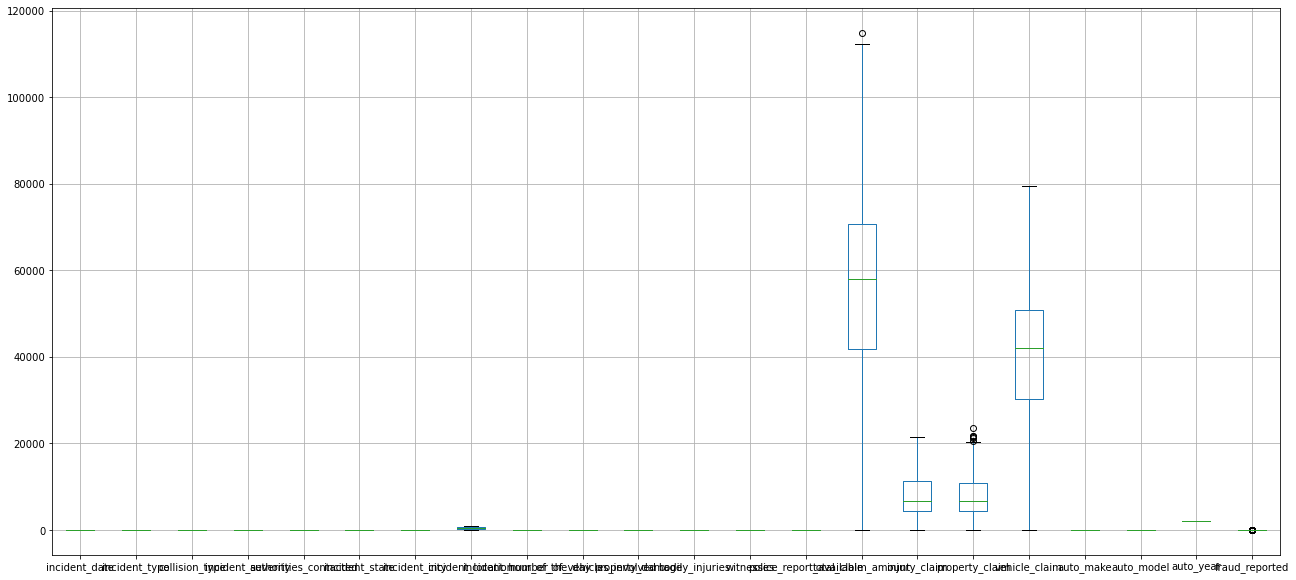

In [34]:
df.iloc[:,16:].boxplot(figsize=(22,20))
plt.subplots_adjust(bottom=0.5)
plt.show()

here we cannot see proper oultiers in each columns so we  plot the all columns 

# removing the outliers by zscore method

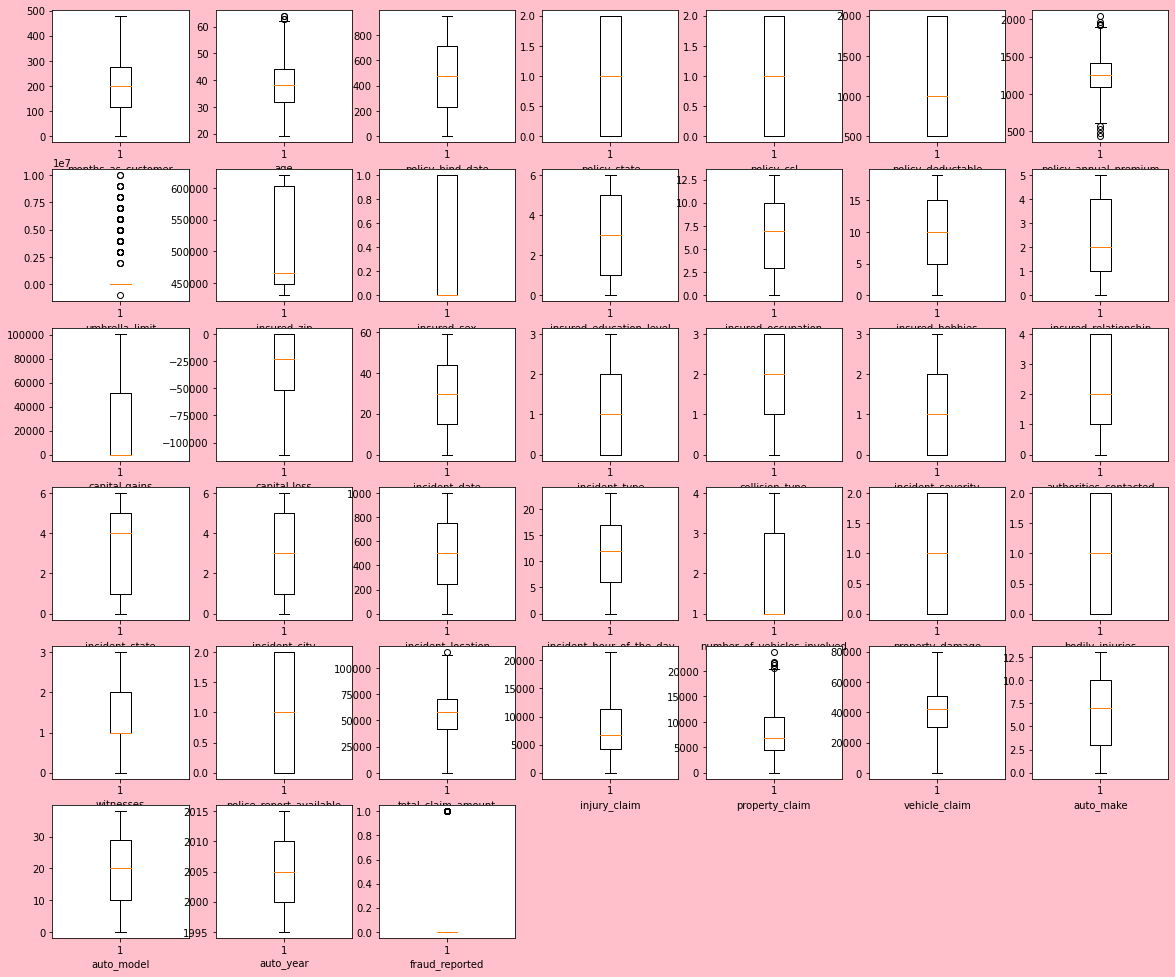

In [35]:
#checking one more time
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=38:
        ax=plt.subplot(7,7,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

umbrella_limit and policy_annual_premium is having outliers in the columns so wewill remove that bym zsscore method

# removing the outliers by zscore method

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.078140,0.990836,0.209500,1.187173,0.060937,0.222383,0.616705,0.479476,0.489529,1.076953,0.530931,1.158316,1.281737,1.437957,1.011331,0.953851,1.138201,0.766005,1.254675,1.260614,1.196963,0.351762,0.962196,1.719927,0.956261,0.823865,1.303656,0.009759,0.461838,1.270313,0.714257,0.189283,1.165505,0.749653,0.856466,1.645743,0.183440,1.746019
1,0.208995,0.334073,1.259397,0.016856,0.060937,1.412784,0.242521,1.697980,0.461008,1.076953,0.530931,0.162558,0.929078,0.247595,0.901927,0.953851,0.674197,1.691132,1.566933,0.195906,1.196963,0.815829,0.995476,0.445137,0.524475,0.823865,1.160722,1.210174,1.338700,1.198712,1.807312,1.363822,1.372696,1.823346,0.360539,0.657470,0.315491,1.746019
2,0.608002,1.088913,1.047470,1.187173,1.182668,1.412784,0.642233,1.697980,0.984885,0.928546,1.557877,1.082141,1.363201,0.347586,0.358023,0.953851,0.848198,1.084249,0.314139,0.195906,1.196963,1.040437,0.962196,0.642591,0.668404,1.140056,0.071467,1.229693,1.362107,0.035801,0.686362,0.054644,0.736072,0.785565,0.631315,0.959702,0.315491,0.572731
3,0.452355,0.224613,1.059589,1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,0.928546,1.557877,1.407256,1.363201,0.942766,0.853388,1.267577,0.601813,0.766005,0.626397,1.260614,1.196963,0.576371,1.451614,0.587166,0.956261,0.823865,1.160722,0.009759,0.461838,0.035801,0.403135,0.224130,0.219722,0.677607,0.879279,1.319074,1.479664,1.746019
4,0.208995,0.552994,1.065634,1.220886,1.304542,0.222383,1.341980,2.133471,1.527808,1.076953,1.522961,1.082141,1.363201,0.942766,1.467210,0.683741,0.268194,1.691132,1.566933,0.195906,0.109052,1.040437,1.451614,0.968217,1.202666,0.823865,0.071467,1.210174,0.438431,0.035801,1.753121,1.257232,1.399654,1.768252,1.623169,1.049545,0.648112,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,0.046021,1.187173,1.304542,0.222383,0.222884,0.479476,0.975717,0.928546,1.044404,1.158316,0.576420,0.942766,0.901927,0.953851,0.848198,0.766005,0.626397,0.195906,0.762060,1.504504,0.506058,0.213042,1.202666,0.823865,1.303656,1.210174,0.438431,1.198712,1.305049,2.051155,0.273817,1.224309,0.135388,1.196528,0.149180,0.572731
996,0.704407,0.224613,1.254543,1.220886,1.182668,0.222383,0.739141,0.479476,1.492519,0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,0.953851,1.022200,0.766005,0.314139,1.260614,0.762060,0.351762,0.016640,0.943968,1.634452,0.823865,1.303656,1.229693,1.362107,1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974,0.572731
997,0.642767,0.541611,0.125944,1.187173,0.060937,1.039966,0.520739,0.826998,0.815138,0.928546,1.044404,1.407256,1.186872,0.247595,0.358023,0.953851,0.906199,1.084249,1.254675,0.195906,1.196963,1.504504,1.451614,0.853901,1.100189,1.140056,1.160722,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,0.028570,1.513924,0.572731
998,2.208028,2.523284,0.358447,1.220886,1.304542,1.412784,0.411866,1.697980,0.830250,1.076953,1.522961,0.411497,1.715859,1.537947,0.901927,0.953851,1.312202,0.766005,0.314139,1.260614,0.543955,1.040437,1.451614,0.240755,1.388046,0.823865,1.160722,1.210174,0.438431,1.270313,0.219110,0.453708,0.451976,0.073580,1.375206,1.286371,1.181303,0.572731


In [38]:
threshold=3
print(np.where(z>3))


(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [39]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,1,1,1,0,4,561,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,129,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,2,0,1,4,3,227,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,509,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45,0,3,1,4,0,0,746,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,573,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52,2,2,0,3,1,0,569,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0


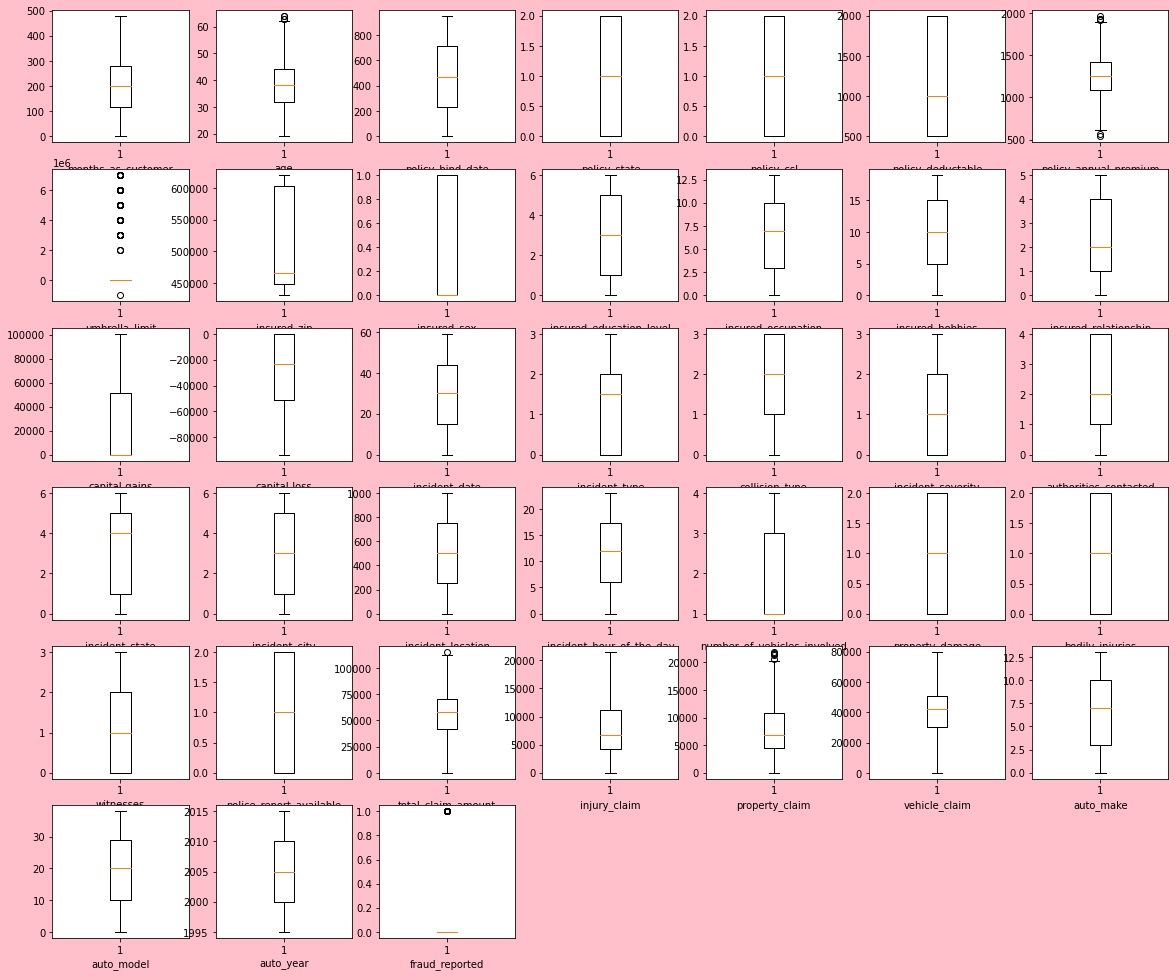

In [40]:
#checking one more time
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=38:
        ax=plt.subplot(7,7,plotnumber)
        plt.boxplot(df_new[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

still some outliers is present in the columns but we cannot use zscore again to avoid the data loss

# checking outliers with percentile technique

In [41]:
df_new.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

df_new['umbrella_limit'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [42]:
df_new['policy_annual_premium'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0     538.170
0.1     954.178
0.2    1050.656
0.3    1124.663
0.4    1197.974
0.5    1257.200
0.6    1323.580
0.7    1387.056
0.8    1454.674
0.9    1567.480
1.0    1969.630
Name: policy_annual_premium, dtype: float64

there is large in 0th and 1 quantile and 90th and 100 the quantile  hence not outlier is present

In [43]:
df_new['umbrella_limit'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0   -1000000.0
0.1          0.0
0.2          0.0
0.3          0.0
0.4          0.0
0.5          0.0
0.6          0.0
0.7          0.0
0.8          0.0
0.9    5000000.0
1.0    7000000.0
Name: umbrella_limit, dtype: float64

outliers is still present

# Creating Feature and label

In [68]:
X=df_new.drop('fraud_reported',axis=1) # all features
y=df_new.fraud_reported                 # label

# Checking skewness

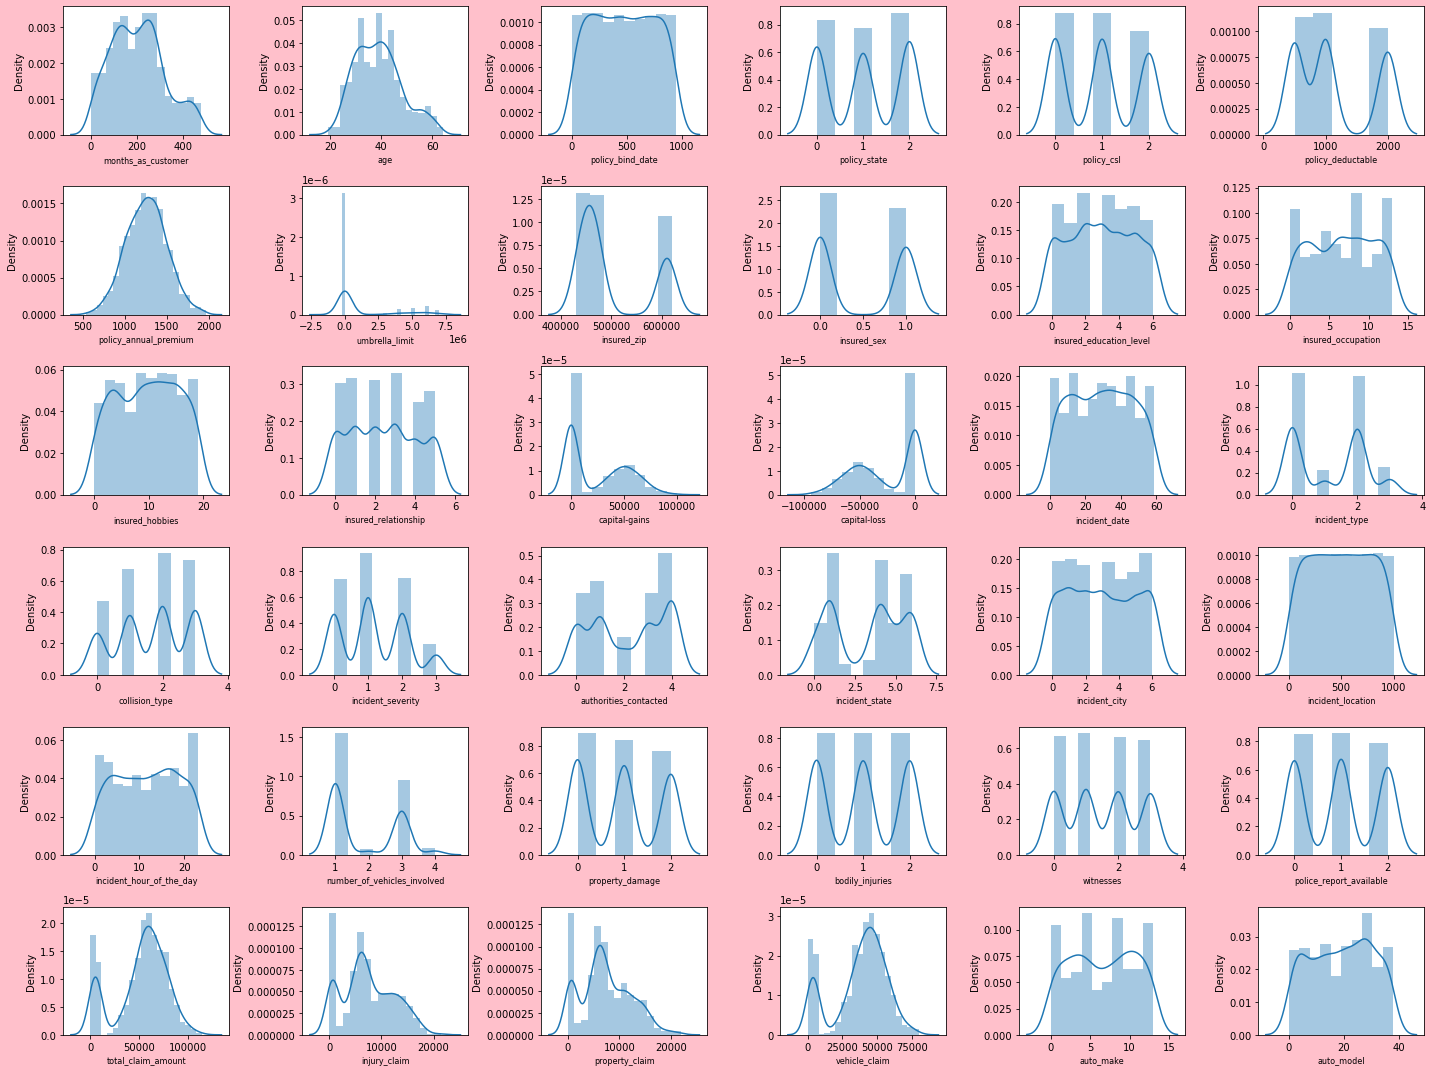

In [69]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()


observations: 

    
here we can see the data is deviated very much 
        
the data is not normally distributed , or data is skewed left side and right side both.
    

In [70]:
#checking skewness in each columns
X.skew().sort_values(ascending=False)

umbrella_limit                 1.801424
insured_zip                    0.837283
number_of_vehicles_involved    0.509725
policy_deductable              0.476090
age                            0.475385
capital-gains                  0.466619
months_as_customer             0.362608
property_claim                 0.361356
incident_severity              0.277726
injury_claim                   0.271759
insured_sex                    0.139324
property_damage                0.101196
policy_csl                     0.098248
incident_type                  0.090563
insured_relationship           0.078339
police_report_available        0.044659
incident_city                  0.043882
policy_annual_premium          0.035964
witnesses                      0.026211
policy_bind_date               0.006386
insured_education_level        0.006286
bodily_injuries                0.003757
incident_date                  0.002604
incident_location             -0.003369
auto_make                     -0.028739


here we can see skewness is present in the columns so we can remove it by power transform method

# Using Power_transform method to remove the skewness

In [71]:
from sklearn.preprocessing import power_transform

In [72]:
x_new=power_transform(X)

In [73]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

25    0.372833
9     0.139324
15    0.088750
14    0.031294
5     0.022179
8     0.000000
1    -0.002183
6    -0.007258
36   -0.013973
19   -0.079569
26   -0.093063
17   -0.095572
4    -0.096814
29   -0.117961
27   -0.133824
0    -0.133972
3    -0.150765
28   -0.151669
13   -0.160168
22   -0.181833
10   -0.187642
18   -0.204055
20   -0.223816
34   -0.229846
11   -0.238129
12   -0.248575
21   -0.256064
24   -0.258027
16   -0.264010
35   -0.276099
23   -0.288690
2    -0.293677
32   -0.357397
31   -0.416732
30   -0.508540
33   -0.521805
7    -7.932397
dtype: float64

In [74]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

number_of_vehicles_involved    0.372833
insured_sex                    0.139324
capital-loss                   0.088750
capital-gains                  0.031294
policy_deductable              0.022179
insured_zip                    0.000000
age                           -0.002183
policy_annual_premium         -0.007258
auto_year                     -0.013973
incident_severity             -0.079569
property_damage               -0.093063
incident_type                 -0.095572
policy_csl                    -0.096814
police_report_available       -0.117961
bodily_injuries               -0.133824
months_as_customer            -0.133972
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
incident_city                 -0.181833
insured_education_level       -0.187642
collision_type                -0.204055
authorities_contacted         -0.223816
auto_make                     -0.229846
insured_occupation            -0.238129


In [75]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [76]:
x1.skew().sort_values(ascending=False)

number_of_vehicles_involved    0.372833
insured_sex                    0.139324
capital-loss                   0.088750
capital-gains                  0.031294
policy_deductable              0.022179
insured_zip                    0.000000
age                           -0.002183
policy_annual_premium         -0.007258
auto_year                     -0.013973
incident_severity             -0.079569
property_damage               -0.093063
incident_type                 -0.095572
policy_csl                    -0.096814
police_report_available       -0.117961
bodily_injuries               -0.133824
months_as_customer            -0.133972
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
incident_city                 -0.181833
insured_education_level       -0.187642
collision_type                -0.204055
authorities_contacted         -0.223816
auto_make                     -0.229846
insured_occupation            -0.238129


In [77]:
sk=x1.skew().sort_values(ascending=False)

applying skewness range 0.5 to -0.5

In [78]:
sk[np.abs(sk)>0.5]

total_claim_amount   -0.508540
vehicle_claim        -0.521805
umbrella_limit       -7.932397
dtype: float64

only total_claim_amount , vehicle_claim,umbrella_limit columns is having -0.5 greater than skewnesss

In [79]:
x1.skew()[np.abs(x1.skew())<0.5].all()

False

# so we can use square root method to remove the skewness

In [80]:
import numpy as np
x1['umbrella_limit']=np.sqrt(x1['umbrella_limit'])


In [81]:
import numpy as np
x1['vehicle_claim']=np.sqrt(x1['vehicle_claim'])

In [82]:
import numpy as np
x1['total_claim_amount']=np.sqrt(x1['total_claim_amount'])

In [83]:
x1.skew().sort_values(ascending=False)

number_of_vehicles_involved    0.372833
insured_sex                    0.139324
capital-loss                   0.088750
capital-gains                  0.031294
vehicle_claim                  0.028313
policy_deductable              0.022179
insured_zip                    0.000000
age                           -0.002183
policy_annual_premium         -0.007258
auto_year                     -0.013973
total_claim_amount            -0.024833
incident_severity             -0.079569
property_damage               -0.093063
incident_type                 -0.095572
policy_csl                    -0.096814
police_report_available       -0.117961
bodily_injuries               -0.133824
months_as_customer            -0.133972
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
incident_city                 -0.181833
insured_education_level       -0.187642
collision_type                -0.204055
authorities_contacted         -0.223816


In [84]:
sk=x1.skew().sort_values(ascending=False)
sk[np.abs(sk)>0.5]

umbrella_limit   -0.798504
dtype: float64

now skewness has been removed except umbrella_limit so we can proceed ahead

# Using PCA technique :

 we have multiple columns are correlated hence instead using VIF and removing multicolinearity columns we will use PCA , it will combine the columns and can prevent from dropping columns and prevent Data

This technique mainly used when we have higher numbers columns

In [85]:
pd.isnull(x1).sum() > 0

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                  True
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
b

the null values is present in the few columns so we can fill it by fillna method

In [86]:
x1['umbrella_limit']=x1['umbrella_limit'].fillna(x1['umbrella_limit'].mean())
x1['total_claim_amount']=x1['total_claim_amount'].fillna(x1['total_claim_amount'].mean())
x1['vehicle_claim']=x1['vehicle_claim'].fillna(x1['vehicle_claim'].mean())

In [87]:
pd.isnull(x1).sum() > 0

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
b

now no null values is present in the dataset

In [88]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)


In [89]:
xpca=pca.fit_transform(x1)

In [90]:
X=xpca

In [91]:
x=pd.DataFrame(X)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.381557,-1.315689,1.322827,3.682263,-0.093773,0.222849,-1.572185,0.510472,0.082568,1.079104
1,3.061577,-0.781725,-0.208122,0.219198,0.458797,-1.277976,-1.127078,-0.801529,1.860069,-0.005298
2,-0.717144,1.192051,-1.395433,-0.592253,0.252881,1.287082,-0.858497,1.640186,-1.768189,-0.049920
3,0.723221,-1.033203,0.219015,-1.749573,2.485696,1.027952,-2.007552,1.179461,-0.147154,0.508831
4,2.571977,-1.286143,0.089412,-1.453599,-0.868328,0.641123,1.421179,1.400144,0.895044,-0.616470
...,...,...,...,...,...,...,...,...,...,...
975,-0.095197,1.497850,2.252416,0.226359,-0.908790,0.068461,-0.687850,0.170903,0.783715,-0.567428
976,-1.975123,-0.903534,2.404642,0.229966,1.576477,-0.778288,-0.029150,-0.861149,-1.689552,0.195053
977,-1.157078,0.915512,-1.323405,0.752070,-0.328838,0.907010,-1.840922,1.501278,-2.163119,0.808548
978,0.663046,-3.326384,0.608828,-1.050953,-2.466083,0.410020,-1.071458,1.412558,1.164215,0.421518


# checking VIF score 

if VIF score is greater than 5 then we can drop that column

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
2,2,1.0
3,3,1.0
7,7,1.0
9,9,1.0
1,1,1.0
6,6,1.0
8,8,1.0
4,4,1.0
0,0,1.0
5,5,1.0


In [93]:
print(x.shape)
print(y.shape)

(980, 10)
(980,)


the values are under 5 value

# Using SMOTE:synthetic minority over sampling technique method: to Balance the data

In [94]:
print(x.shape)
print(y.shape)

(980, 10)
(980,)


In [95]:
print(y.value_counts())

0    740
1    240
Name: fraud_reported, dtype: int64


here we can see the data is imbalanced here we are using  balancing technique because our dataset is imbalanced

In [96]:
from imblearn.over_sampling  import SMOTE

In [97]:
smt=SMOTE()

In [98]:
trainx,trainy=smt.fit_resample(x,y)

In [99]:
trainx.value_counts()

0          1          2          3          4          5          6          7          8          9        
-3.583163  -1.273482  -0.076665  -2.199534   1.640667   0.011412  -0.833175  -0.172029   0.085460   0.008815    1
 0.211833  -0.709609   0.663093   0.120801   1.021237  -0.896670  -1.145677  -0.189546  -0.180361   0.062867    1
 0.240381   1.241444   0.451746   0.228716   2.017028   0.605309   0.008395   0.415444  -0.075002   0.955342    1
 0.240023   0.311213   1.698675  -0.586712  -0.084038   0.051247   1.629086   0.763367   0.626507   0.680958    1
 0.239939  -1.552569   1.343490   0.759944  -1.647150   2.744313   0.242808   1.075312   0.130514  -0.479922    1
                                                                                                               ..
-1.110590   0.907146  -0.486290  -1.034603  -0.861925  -0.175107   0.124716  -2.731055  -1.383606  -2.232769    1
-1.116701  -0.032084  -1.580699  -1.455876   1.350752  -0.408542  -1.711588  -1.434889  -0.14

In [121]:
trainy.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [122]:
X1=trainx
y=trainy

In [123]:
X1.shape

(1480, 10)

In [124]:
y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

now our data is balanced

so wecan proceed ahead

# model prediction:

# Using Logistic Regression  Algorithm

The data is categorical hence we will use Classification model for prediction

In [125]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6351351351351351 Random state 0.1
accuracy 0.6476683937823834 Random state 0.13
accuracy 0.6486486486486487 Random state 0.15
accuracy 0.652027027027027 Random state 0.2
accuracy 0.6748466257668712 Random state 0.22
Best accuracy is 67.48466257668711 on Random state 0.22


In [126]:
#finding the best random state
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.22,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6625766871165644 Random state 1
accuracy 0.6687116564417178 Random state 31
accuracy 0.6748466257668712 Random state 32
accuracy 0.6779141104294478 Random state 35
accuracy 0.6932515337423313 Random state 44
Best accuracy is 69.32515337423312 on Random state 44


In [127]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.22,random_state=44) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.7944785276073619
[[117  41]
 [ 26 142]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       158
           1       0.78      0.85      0.81       168

    accuracy                           0.79       326
   macro avg       0.80      0.79      0.79       326
weighted avg       0.80      0.79      0.79       326



# logistic regression is giving 79.44% accuracy

=====================================================================================================

# Using Random Forest Classifier Algorithm:

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8108108108108109 Random state 0.1
accuracy 0.8220858895705522 Random state 0.11
accuracy 0.8426966292134831 Random state 0.12
accuracy 0.8513513513513513 Random state 0.15
Best accuracy is 85.13513513513513 on Random state 0.15


In [129]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.15,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8513513513513513 Random state 1
accuracy 0.8783783783783784 Random state 5
accuracy 0.8828828828828829 Random state 110
accuracy 0.8873873873873874 Random state 249
accuracy 0.8918918918918919 Random state 392
Best accuracy is 89.1891891891892 on Random state 392


In [132]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.15,random_state=392) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.8603603603603603
[[92 20]
 [11 99]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       112
           1       0.83      0.90      0.86       110

    accuracy                           0.86       222
   macro avg       0.86      0.86      0.86       222
weighted avg       0.86      0.86      0.86       222



# Random forest is giving 86.03% accuracy

===========================================================================================

# Support vector classifier

In [133]:
#finding the best test_SIZE
from sklearn.svm import SVC
sv=SVC()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.722972972972973 Random state 0.1
accuracy 0.7257383966244726 Random state 0.16
accuracy 0.7415730337078652 Random state 0.18
Best accuracy is 74.15730337078652 on Random state 0.18


In [134]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.18,random_state=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7677902621722846 Random state 1
Best accuracy is 76.77902621722846 on Random state 1


In [135]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.18,random_state=10)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)

Accuracy 70.4119850187266
[[ 7500  5600]
 [ 2300 11300]]


# svc is giving 70.41% accuracy

 ============================================================

# KNeighborsClassifier Model

In [136]:
#finding the best test_size
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7094594594594594 Random state 0.1
accuracy 0.7239263803680982 Random state 0.11
accuracy 0.7584269662921348 Random state 0.12
accuracy 0.7702702702702703 Random state 0.15
Best accuracy is 77.02702702702703 on Random state 0.15


In [137]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.15,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7477477477477478 Random state 1
accuracy 0.7612612612612613 Random state 14
accuracy 0.7657657657657657 Random state 26
accuracy 0.7837837837837838 Random state 80
Best accuracy is 78.37837837837837 on Random state 80


In [138]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.15,random_state=80)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)

Accuracy 78.37837837837837
[[ 6800  3900]
 [  900 10600]]


# knc is giving 78.37% accuracy

 ===============================================================

# GaussianNB Algorithm:

In [139]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [140]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.5743243243243243 Random state 0.1
accuracy 0.6073619631901841 Random state 0.11
accuracy 0.6573033707865169 Random state 0.12
accuracy 0.6580310880829016 Random state 0.13
accuracy 0.6634615384615384 Random state 0.14
accuracy 0.6708860759493671 Random state 0.16
Best accuracy is 67.08860759493672 on Random state 0.16


In [141]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.16,random_state=i)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.679324894514768 Random state 1
accuracy 0.6877637130801688 Random state 26
accuracy 0.7046413502109705 Random state 42
Best accuracy is 70.46413502109705 on Random state 42


In [142]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.16,random_state=42)
gn.fit(x_train,y_train)
pred=gn.predict(x_test)
acc=gn.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)

Accuracy 70.46413502109705
[[7400 4300]
 [2700 9300]]


# GaussianNB is giving 70.46% accuracy

=================================================================

# Desicion Tree classifier Algorithm:

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [144]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.7094594594594594 Random state 0.1
accuracy 0.754601226993865 Random state 0.11
accuracy 0.7564766839378239 Random state 0.13
Best accuracy is 75.64766839378238 on Random state 0.13


In [145]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.12,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7303370786516854 Random state 1
accuracy 0.7415730337078652 Random state 3
accuracy 0.7471910112359551 Random state 4
accuracy 0.7528089887640449 Random state 10
accuracy 0.7752808988764045 Random state 16
accuracy 0.797752808988764 Random state 24
Best accuracy is 79.7752808988764 on Random state 24


In [146]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.24,random_state=93)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)


Accuracy 67.13483146067416
[[11300  6700]
 [ 5000 12600]]


# Desicion tree clasifier is giving 61.13% accuracy

============================================================================

# random forest classifier is giving highest accuracy ,now we will check validaion score of the all models

# Cross Validatiion

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
#logistic regression
scr=cross_val_score(lr,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.6418918918918919


In [149]:
#desiciontree classifier
scr=cross_val_score(dt,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7135135135135136


In [150]:
#random forest classifier
scr=cross_val_score(rf,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.8121621621621621


In [151]:
#SVC
scr=cross_val_score(sv,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7


In [152]:
#KNC 
scr=cross_val_score(knc,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7087837837837838


In [153]:
scr=cross_val_score(gn,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.6256756756756757


Random forest Classifier is giving highest vaidation score

so random forest Classifier is performing better among all so we will continue with support vector classifier

# Using Hyperparameter tunning

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
from sklearn.model_selection import GridSearchCV
dt1=RandomForestClassifier()
params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }


grd=GridSearchCV(dt1,param_grid=params,cv=5,scoring='accuracy') 
grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

dt1=grd.best_estimator_

dt1.fit(x_train,y_train)

y_pred=dt1.predict(x_test)

dt_conf_mat=confusion_matrix(y_test,y_pred)

print(dt_conf_mat)

print(accuracy_score(y_test,y_pred))
    

best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[126  54]
 [ 25 151]]
0.7780898876404494


By usig hyper parameter tunning our accuracy is increased

In [156]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.15,random_state=392)
rf=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'auto')
rf.fit(x_train,y_train)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 85.58558558558559
[[9100 2100]
 [1100 9900]]


The Accuracy for Random forest model with best Parameter is 85.58%

# by using hyper parameter tunning accurac is  85.58%

#  ROC corve

In [157]:
y_pred=sv.predict(x_test)

In [158]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [159]:
fpr,tpr,thresholds

(array([0.        , 0.86363636, 1.        ]),
 array([0.        , 0.24107143, 1.        ]),
 array([2, 1, 0]))

In [160]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.86363636 1.        ]
True positive rate [0.         0.24107143 1.        ]


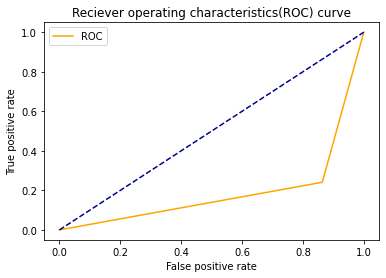

In [161]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [162]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

81.12824675324676


# Classification Report

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       112
           1       0.78      0.86      0.82       110

    accuracy                           0.81       222
   macro avg       0.81      0.81      0.81       222
weighted avg       0.81      0.81      0.81       222



# saving the model in pickel format

In [164]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"INSURANCE_CLAIM.pk1")

['INSURANCE_CLAIM.pk1']

# Testing Model with Future Data for output

In [166]:
X1.iloc[1]

0    3.061577
1   -0.781725
2   -0.208122
3    0.219198
4    0.458797
5   -1.277976
6   -1.127078
7   -0.801529
8    1.860069
9   -0.005298
Name: 1, dtype: float64

In [167]:
y.iloc[1]

1

we will take exist data as sample data to compare predict output

In [168]:
t=np.array([3.061577,-0.781725,-0.208122,0.219198,0.458797,-1.277976,-1.127078,-0.801529,1.860069,-0.005298])

In [169]:
t.shape

(10,)

In [170]:
x_train.shape

(1258, 10)

In [171]:
t=t.reshape(1,-1)
t.shape

(1, 10)

In [172]:
rf.predict(t)

array([1])

we can see the actual and predicted data is matched hence model is predicting Good